In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

from sklearn.tree import DecisionTreeClassifier 
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier


0. load data 
- dummies
- no dummies

In [32]:
# dummies
data = pd.read_csv('data/loan_2018_2020_final_dummies.csv',index_col=0) 
data.head()

,Charged Off,loan_amnt,installment,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,...,term_60,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,addr_state_NorEast,addr_state_South,addr_state_West,application_type_Joint App
0,0,14100.0,552.23,14.12,1.0,2005,0.0,12.0,0.0,62.6,...,0,0,1,0,0,1,0,1,0,0
1,1,20000.0,466.10,11.40,0.0,2002,0.0,12.0,0.0,46.2,...,1,0,0,1,0,0,1,0,0,0
2,0,7000.0,232.44,20.25,0.0,2007,0.0,13.0,0.0,36.0,...,0,0,0,0,0,0,0,1,0,0
3,0,21000.0,560.94,15.76,1.0,2008,0.0,15.0,0.0,34.2,...,1,0,1,0,0,0,1,0,0,0
4,0,40000.0,838.71,4.09,0.0,1996,0.0,6.0,1.0,9.4,...,1,0,0,0,0,1,1,0,0,0


In [3]:
data.columns

Index(['Charged Off', 'loan_amnt', 'installment', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'log_annual_inc', 'log_revol_bal', 'term_60',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'addr_state_NorEast', 'addr_state_South', 'addr_state_West',
       'application_type_Joint App'],
      dtype='object')

In [4]:
# subset
#subset = data[:100000]  
                       

#X = subset.iloc[:, 1:] # df                    # X = X.reshape(-1, 1)
#y = subset['Charged Off'] # Series


# all data

X = data.iloc[:, 1:]               
y = data['Charged Off']


print(X.shape)
print(y.shape)

(246004, 27)
(246004,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [50]:
# baseline rate of Charged Off
np.mean(y_train)

0.233625

In [54]:
baseline_prob = np.mean(y_train)
baseline_prob

0.233625

In [55]:
baseline_y_pred = [baseline_prob for _ in range(len(y_test))]
avg_logloss = log_loss(y_test, baseline_y_pred)
avg_logloss

0.5411545003973998

# 1. Logistic Regression

start with a subset of the clean dataframe (in terms of both observations and features) as building:
- MVP 
- baseline model
- Then can scale up to more data after that

### 1a. Logistic Regression


#### 1a3. baseline: Scale before Logistic Regression  
Scale is important for LogReg : )


In [56]:
std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)  # X_train : .fit_transform


# do I need to scale on Test set too?  YES!!
X_test_scaled = std_scale.transform(X_test)       # X_test: no fit, only .transform


lm3 = LogisticRegression()
lm3.fit(X_train_scaled, y_train)

y_pred_3 = lm3.predict(X_test_scaled)         # predict on scaled test


print("Model - Scaled Logisitc Rgression")

print("score on Test set:", lm3.score(X_test_scaled, y_test))     # target doesnt need to be scaled
print("score on Train set:", lm3.score(X_train_scaled, y_train))  
print("accuracy score:   ", (accuracy_score(y_test, y_pred_3))) 

#TRY

print("Fbeta_2 score:", (fbeta_score(y_test, y_pred_3, beta = 2)))

print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_3))

print(classification_report(y_test, y_pred_3))

Model - Scaled Logisitc Rgression
score on Test set: 0.77325
score on Train set: 0.771475
accuracy score: 0.77325
confusion matrix: 

 [[14898   471]
 [ 4064   567]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     15369
           1       0.55      0.12      0.20      4631

    accuracy                           0.77     20000
   macro avg       0.67      0.55      0.53     20000
weighted avg       0.73      0.77      0.71     20000



In [ ]:
- recall drop or up ? Does C work

- recall increases from 0.02 (no scale) to 0.12
- F1 score is 0.20

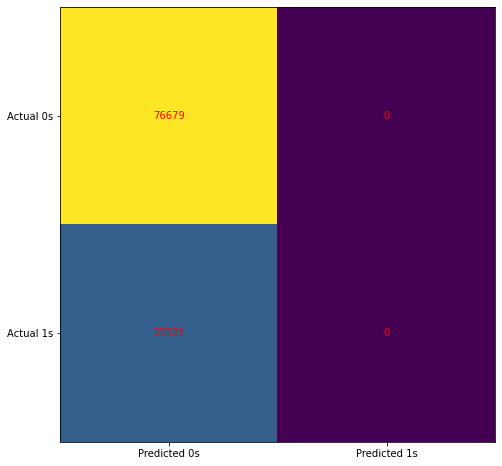

In [57]:
# cm   (NO NEED - CAN DELETE LATER)

cm = confusion_matrix(y_test, lm3.predict(X_test_scaled))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#plt.title('Confusion Matrix - Scaled Logisitc Rgression', fontsize= 20)


# confusion Matrix -> want it balance 

In [58]:
lm3.coef_

array([[-0.95460413,  1.21153263, -0.00744588,  0.05303014,  0.06833834,
         0.19935749,  0.22739279,  0.02804004,  0.22651413, -0.23933772,
         0.04196499,  0.01048762,  0.01958201, -0.00525263,  0.01166838,
        -0.19998824, -0.10826605,  0.62765639, -0.0021779 ,  0.06851699,
         0.24448614, -0.15068215, -0.11397928,  0.04044394,  0.06067572,
        -0.03767346, -0.02626145]])

In [59]:
X.columns

Index(['loan_amnt', 'installment', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'log_annual_inc', 'log_revol_bal', 'term_60', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'addr_state_NorEast', 'addr_state_South',
       'addr_state_West', 'application_type_Joint App'],
      dtype='object')

Remember coef they are in log odds units:  
- A one unit change in "loan amount" corresponds to a -0.954 unit change in the log odds of Charged Off
- A one unit change in "dti" corresponds to a -0.0074 unit change in the log odds of Charged Off


In [60]:
# any zero coef ?  -> TA: can drop it later if i want

print(X.columns[11])
print(X.columns[13])
print(X.columns[18])

acc_now_delinq
delinq_amnt
home_ownership_OTHER


#### 1a4. Tune C on Scale Logistic Regression  

- C up  : decrease more regularization 

In [61]:
std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)  


X_test_scaled = std_scale.transform(X_test)     


lm4 = LogisticRegression(C =100000000000000)  # C up
lm4.fit(X_train_scaled, y_train)

y_pred_4 = lm4.predict(X_test_scaled)      


print("Model - Scaled Logisitc Rgression")
print("score on Test set:", lm4.score(X_test_scaled, y_test))     # target doesnt need to be scaled
print("score on Train set:", lm4.score(X_train_scaled, y_train))  
 
print("accuracy score:", (accuracy_score(y_test, y_pred_4)))  
print("Fbeta_2 score:", (fbeta_score(y_test, y_pred_4, beta = 2)))

print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_4))

print(classification_report(y_test, y_pred_4))

Model - Scaled Logisitc Rgression
score on Test set: 0.7733
score on Train set: 0.771475
accuracy score: 0.7733
confusion matrix: 

 [[14897   472]
 [ 4062   569]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     15369
           1       0.55      0.12      0.20      4631

    accuracy                           0.77     20000
   macro avg       0.67      0.55      0.53     20000
weighted avg       0.73      0.77      0.71     20000



- recall drop or up ? Does C work?

In [62]:
# TA: recall drop from 0.19 to 0.17 tho. Not a good choice to tune C?

# too high -> overfitting 
# too low -> not complex enough

In [63]:
lm4.coef_

array([[-0.95894572,  1.21558238, -0.00747283,  0.05297229,  0.06827428,
         0.19929368,  0.22739926,  0.02801945,  0.22628383, -0.23938413,
         0.0419514 ,  0.01049049,  0.01957355, -0.00525421,  0.01164512,
        -0.19992937, -0.10823205,  0.62874262, -0.00218696,  0.06850095,
         0.24447196, -0.15069516, -0.11406837,  0.04043813,  0.06067251,
        -0.03767761, -0.02627418]])

In [64]:
# delinq_2yrs
# check density : # 3D 

### 1b. Class Imbalance  

- goal is to balance the sample (positive vs negative ratio)
- Solutions: Weighted Class -> Oversampling 3: 1

In [65]:
data["Charged Off"].value_counts(normalize=True)

0    0.794137
1    0.205863
Name: Charged Off, dtype: float64

In [66]:
# TA:  auto -> model do the ratio for you 
# TA:  use F beta instead of F1 : beta = recall : pre = 3

# TA: should i use Oversampling on Scaled LogReg ? or simple Lg?  A: Scaled LogReg

####  1b2.  Use Function in Scaled LogReg to balance (quicker!)

In [240]:
std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)  
X_test_scaled = std_scale.transform(X_test)   

In [241]:
                                                       #(class_weight = 3)      # Lew
lm5_os = LogisticRegression(solver='liblinear', class_weight = 'balanced')   
lm5_os.fit(X_train_scaled, y_train)    

y_pred_5 = lm5_os.predict(X_test_scaled)

# score on test set
print('Scaled Logistic Regression on Oversampled Train Data 3 Times; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, y_pred_5), roc_auc_score(y_test, lm5_os.predict_proba(X_test)[:,1])))

Scaled Logistic Regression on Oversampled Train Data 3 Times; Test F1: 0.456, Test AUC: 0.500


In [242]:
print("Model - Scaled Logisitc Rgression on Auto Oversampling")
print("score on Test set:", lm5_os.score(X_test_scaled, y_test))    
print("score on Train set:", lm5_os.score(X_train_scaled, y_train))  
                                    
print("accuracy score:", (accuracy_score(y_test, y_pred_5))) 

print("Fbeta_2 score:", (fbeta_score(y_test, y_pred_5, beta = 2)))

print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_5))

print(classification_report(y_test, y_pred_5))

Model - Scaled Logisitc Rgression on Auto Oversampling
score on Test set: 0.6591
score on Train set: 0.656225
accuracy score: 0.6591
confusion matrix: 

 [[10324  5045]
 [ 1773  2858]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75     15369
           1       0.36      0.62      0.46      4631

    accuracy                           0.66     20000
   macro avg       0.61      0.64      0.60     20000
weighted avg       0.74      0.66      0.68     20000



### SCALED 101

- std_scale = StandardScaler()

- only scaled on X  (target y doesnt need it)  

- code: 
                                          
    -  .fit_transform(X_train)
    - . transform(X_test)

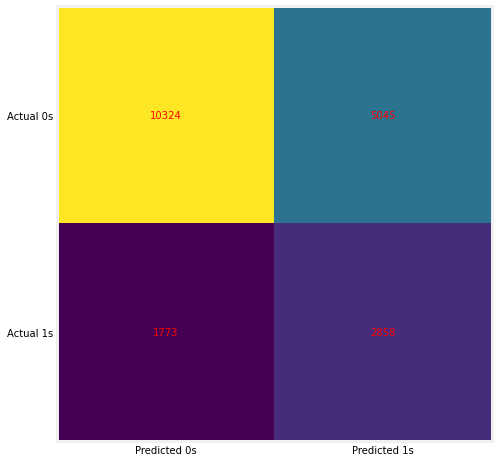

In [243]:
# TRY 1: Test data - cm ( show me the result how the model doing on test )

# cm : TEST data  # show y_test                  # SCALED!!
cm = confusion_matrix(y_test, lm5_os.predict(X_test_scaled))  

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

# plt.title('Confusion Matrix - Scaled Logisitc Rgression on Auto Oversampling', fontsize= 20)
plt.show()
#./charts/cm_scaled_lm5_os.pngplt.savefig('./charts/cm_scaled_lm5_os.png')

### 1c. ROCAUC Score Plot

#### 1c1. simple scaled logistic regression

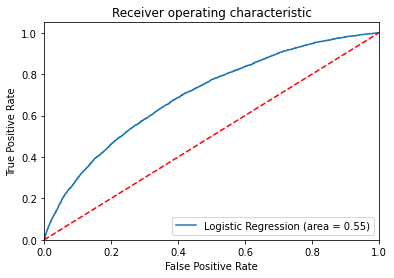

In [78]:
lm3_roc_auc = roc_auc_score(y_test, lm3.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, lm3.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lm3_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### 1c2.  scaled logistic regression on Auto Oversampling on Train data

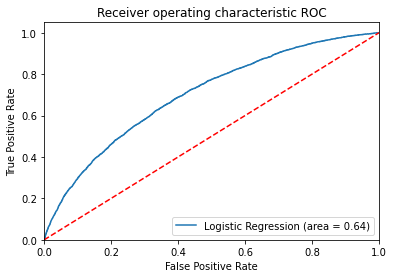

In [79]:
lm5_os_roc_auc = roc_auc_score(y_test, lm5_os.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, lm5_os.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lm5_os_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [80]:
# ROC curev

# soft predicting -> good if I need ranking

# was not smooth when I put 1000 data 

# smooth now ! -> after i put 10k data point  --> get better

## 2. KNN

### 2a. baseline

In [81]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("accuracy:", metrics.accuracy_score(y_test, y_pred_knn))    ###

print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))

print("F_beta_2 :",metrics.fbeta_score(y_test, y_pred_knn, beta= 2))

print("kNN confusion matrix: \n\n", confusion_matrix(y_test, knn.predict(X_test)))

accuracy: 0.7378
The score for kNN is
Training:  80.70%
Test set:  73.78%
F_beta  : 0.19998184046851594
kNN confusion matrix: 

 [[13875  1494]
 [ 3750   881]]


#### 2b. GridSearchCV
to find the best parameters

In [198]:
#k_range = list(range(1, 50))
                                          # param_grid = dict(n_neighbors=k_range)
#weight_options = ['uniform', 'distance']
#param_grid = dict(n_neighbors=k_range, weights=weight_options)
#grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
#grid.fit(X, y)

In [ ]:
# examine the best model
#print("Best params: ", grid.best_params_)
#print("Best estimator: ", grid.best_estimator_)
#print("Best score: ", grid.best_score_)

In [ ]:
# train  model using all data and the best known parameters
#knn_best = KNeighborsClassifier(n_neighbors=38, weights='uniform')

# knn_best.fit(X_train, y_train)  # equal to  grid.fit
# y_pred = knn_best.predict(X_test)

#knn_best.fit(X, y)
#y_pred = knn_best.predict(X)

In [ ]:
#print("accuracy:", metrics.accuracy_score(y, y_pred))     # accuracy up!
#print("Fbeta_2 :",metrics.fbeta_score(y, y_pred, beta= 2))  # but fbeta so bad
#print("kNN confusion matrix: \n\n", confusion_matrix(y, y_pred))


accuracy up!  but fbeta so bad..useless

In [ ]:
#t = data.iloc[1, 1:]
#knn_best.predict([t])  # bad model...wrong prediction

In [ ]:
#grid.predict([t])

# 3. Tree Models

## 3a. Decision Tree

- will tune it if i have time 
- (or not - since Decision Tree has Overfitting problem even prune can't help much - so just skip!)

In [237]:
clf = DecisionTreeClassifier()          # let it grow -> no limit on max_depth
clf = clf.fit(X_train, y_train)     
                                              
y_pred_clf = clf.predict(X_test)
print("Recall: ",metrics.recall_score(y_test, y_pred_clf))
print("F_1:    ",metrics.f1_score(y_test, y_pred_clf))
print("Fbeta_2:",metrics.fbeta_score(y_test, y_pred_clf, beta= 2))
print("Fbeta_3:",metrics.fbeta_score(y_test, y_pred_clf, beta= 3))


Recall:  0.33124595119844524
F_1:     0.31812525922853585
F_beta3: 0.325869906955007
F_beta3: 0.32853593763385586


## 3b. Random Forest

### 3b1.  baseline/benchmark
Random forest Classifier

In [6]:
rf = RandomForestClassifier() #n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [7]:
print("Accuracy:  ",metrics.accuracy_score(y_test, y_pred_rf))
print("Recall:    ",metrics.recall_score(y_test, y_pred_rf))
print("F_1:       ",metrics.f1_score(y_test, y_pred_rf))
print("F_beta2:   ",metrics.fbeta_score(y_test, y_pred_rf, beta= 2))
print("F_beta3:   ",metrics.fbeta_score(y_test, y_pred_rf, beta= 3))
print("Precision: ",metrics.precision_score(y_test, y_pred_rf))

print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))

Accuracy:   0.7972195687079531
Recall:     0.06193727119817948
F_1:        0.1114970166533084
F_beta2:    0.07533092659446451
F_beta3:    0.06798067003312158
Precision:  0.5579322638146168
confusion matrix: 

 [[38598   496]
 [ 9481   626]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     39094
           1       0.56      0.06      0.11     10107

    accuracy                           0.80     49201
   macro avg       0.68      0.52      0.50     49201
weighted avg       0.75      0.80      0.73     49201



### 3b2. Random forest Classifier with class imbalance 
- class imbalance : fixed by class_weight
-  min_samples_leaf: change from default 1 to 10 ( increase the leaf to be fatter )

In [8]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs = -1,class_weight="balanced",random_state =50 , min_samples_leaf = 10)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [9]:
print("Accuracy:  ",metrics.accuracy_score(y_test, y_pred_rfc))           #  rfc.score(X_test,y_test) = accuracy
print("Recall:    ",metrics.recall_score(y_test, y_pred_rfc))
print("F_1:       ",metrics.f1_score(y_test, y_pred_rfc))
print("F_beta2:   ",metrics.fbeta_score(y_test, y_pred_rfc, beta= 2))
#print("F_beta3:   ",metrics.fbeta_score(y_test, y_pred_rfc, beta= 3))
print("Precision: ",metrics.precision_score(y_test, y_pred_rfc))

print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc))

print(classification_report(y_test, y_pred_rfc))

Accuracy:   0.7437043962521087
Recall:     0.4405857326605323
F_1:        0.41392452128648444
F_beta2:    0.4295194552153867
Precision:  0.3903058988517837
confusion matrix: 

 [[32138  6956]
 [ 5654  4453]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84     39094
           1       0.39      0.44      0.41     10107

    accuracy                           0.74     49201
   macro avg       0.62      0.63      0.62     49201
weighted avg       0.76      0.74      0.75     49201



In [10]:
rfc.feature_importances_

array([8.69581914e-02, 1.35027507e-01, 9.72693931e-02, 9.80038403e-03,
       6.22767347e-02, 2.43486339e-02, 5.56367801e-02, 4.54045402e-03,
       1.16037405e-01, 7.59215152e-02, 1.04891972e-03, 0.00000000e+00,
       2.66395362e-04, 0.00000000e+00, 4.06333241e-03, 9.03619837e-02,
       9.68609697e-02, 5.03153559e-02, 4.27309947e-05, 5.64070035e-03,
       3.11637203e-02, 8.26698923e-03, 1.14851301e-02, 5.89387200e-03,
       1.08182626e-02, 1.12495825e-02, 4.70505742e-03])

In [11]:
# feature importance

feature_list = list(X_train.columns)

# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: installment          Importance: 0.135
Variable: revol_util           Importance: 0.116
Variable: dti                  Importance: 0.0973
Variable: log_revol_bal        Importance: 0.0969
Variable: log_annual_inc       Importance: 0.0904
Variable: loan_amnt            Importance: 0.087
Variable: total_acc            Importance: 0.0759
Variable: earliest_cr_line     Importance: 0.0623
Variable: open_acc             Importance: 0.0556
Variable: term_60              Importance: 0.0503
Variable: home_ownership_RENT  Importance: 0.0312
Variable: inq_last_6mths       Importance: 0.0243
Variable: purpose_debt_consolidation Importance: 0.0115
Variable: addr_state_West      Importance: 0.0112
Variable: addr_state_South     Importance: 0.0108
Variable: delinq_2yrs          Importance: 0.0098
Variable: purpose_credit_card  Importance: 0.0083
Variable: addr_state_NorEast   Importance: 0.0059
Variable: home_ownership_OWN   Importance: 0.0056
Variable: application_type_Joint App Importance

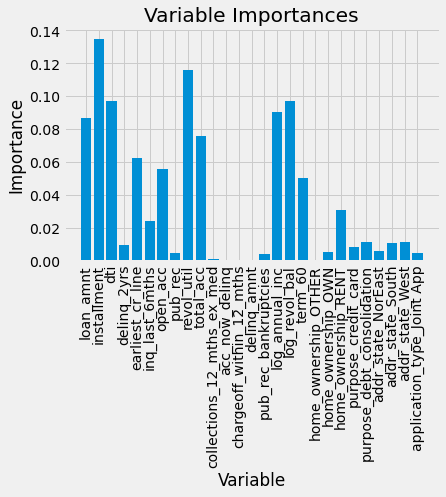

In [12]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### 3b2. Tuning....Random forest Classifier with class balance and tuned min_sample_leaf

#### min_sample_leaf 
 - sample number of mini leaf
 - increase : will make leaf fatter 
 
- purpose: prevent spliting more deeper
-  less than the number ->  not the same as prune (cut) but doing the simialr thing 

HERE I model by

- increased from 10  -> 30 --> 50 (F2 score went up!)

In [13]:
 #  (min_samples_leaf= 50) (default was 1)        

rfc_3 = RandomForestClassifier(n_estimators=100,n_jobs = -1,class_weight="balanced",random_state =50, 
                               min_samples_leaf = 50) 
rfc_3.fit(X_train,y_train)
y_pred_rfc_3 = rfc_3.predict(X_test)

In [14]:
print("Accuracy:  ",metrics.accuracy_score(y_test, y_pred_rfc_3))           #  rfc.score(X_test,y_test) = accuracy
print("Recall:    ",metrics.recall_score(y_test, y_pred_rfc_3))
print("F_1:       ",metrics.f1_score(y_test, y_pred_rfc_3))
print("F_beta2:   ",metrics.fbeta_score(y_test, y_pred_rfc_3, beta= 2))
#print("F_beta3:   ",metrics.fbeta_score(y_test, y_pred_rfc_3, beta= 3))
print("Precision: ",metrics.precision_score(y_test, y_pred_rfc_3))

print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc_3))

print(classification_report(y_test, y_pred_rfc_3))

Accuracy:   0.6709619723176358
Recall:     0.6091817552191551
F_1:        0.432024699154475
F_beta2:    0.5233408132734937
Precision:  0.33469232441835184
confusion matrix: 

 [[26855 12239]
 [ 3950  6157]]
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     39094
           1       0.33      0.61      0.43     10107

    accuracy                           0.67     49201
   macro avg       0.60      0.65      0.60     49201
weighted avg       0.76      0.67      0.70     49201



Compare to 
min_samples_leaf = 30

- Accuracy:   0.68365
- Recall:     0.5737421723169942
- F_1:        0.4564899922687054
- F_beta2:    0.5202866765880787
- Precision:  0.3790299572039943

Compare to min_samples_leaf = 10  (before 3b2 model)

- Accuracy:   0.7232                 
- Recall:     0.45109047721874324
- F_1:        0.4301008853201565
- F_beta2:    0.4424535095522514
- F_beta3:    0.44673025105855185    (up 10%)
- Precision:  0.41097776903403505    (down 4%)

Variable: installment          Importance: 0.1551
Variable: revol_util           Importance: 0.1154
Variable: term_60              Importance: 0.1083
Variable: loan_amnt            Importance: 0.1023
Variable: log_annual_inc       Importance: 0.0775
Variable: dti                  Importance: 0.0757
Variable: log_revol_bal        Importance: 0.0683
Variable: total_acc            Importance: 0.0659
Variable: home_ownership_RENT  Importance: 0.063
Variable: earliest_cr_line     Importance: 0.0451
Variable: open_acc             Importance: 0.0359
Variable: inq_last_6mths       Importance: 0.032
Variable: addr_state_West      Importance: 0.0097
Variable: addr_state_South     Importance: 0.0078
Variable: purpose_debt_consolidation Importance: 0.0075
Variable: delinq_2yrs          Importance: 0.0074
Variable: purpose_credit_card  Importance: 0.0059
Variable: home_ownership_OWN   Importance: 0.005
Variable: pub_rec              Importance: 0.0032
Variable: addr_state_NorEast   Importance: 0.00

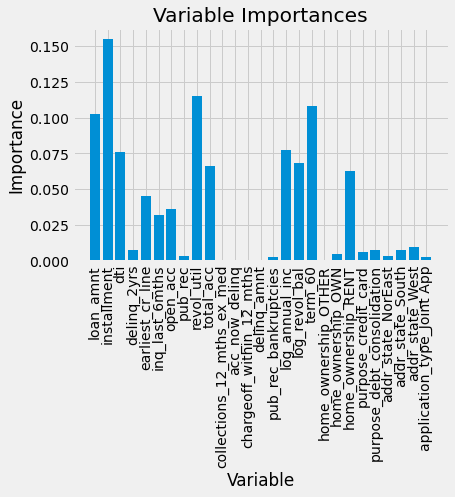

In [15]:
# feature importance

feature_list = list(X_train.columns)
importances = list(rfc_3.feature_importances_)  # change model here
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [181]:
# TA: should i use cross_validation?  Yes 

# will get better( for smaller dataset)
# if data is large, it's fine doenst matter

In [ ]:
# 4 ensemble

#from sklearn import cross_validation, ensemble

#forest = ensemble.RandomForestClassifier(n_estimators = 100)  # ensemble.RandomForestClassifier
#forest_fit = forest.fit(train_X, train_y)

# 預測
#test_y_predicted = forest.predict(test_X)

#accuracy = metrics.accuracy_score(test_y, test_y_predicted)
#print(accuracy)

### 3b3. GridSearchCV Tuning....Random forest Classifier 


#### Tuning priority:
1. max_features
2. max_depth
3. min_samples_split
4. min_samples_leaf


(1, 2 are bigger picture; 3, 4 are more details on leaf)



https://www.cnblogs.com/pinard/p/6160412.html

In [16]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV


ftwo_scorer = make_scorer(fbeta_score, beta=2)

#### 0. min_samples_leaf : 50, 100  
(50 , 70 , 100 not impoving much)

In [17]:
param_test0_rf = {"min_samples_leaf" : [10, 30, 50, 70, 100]}  # 50 , 70 , 100 not impoving much 


rf_gsearch0 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100,n_jobs = -1,class_weight="balanced",random_state =50),param_grid=param_test0_rf, scoring=ftwo_scorer,cv=10)
rf_gsearch0.fit(X_train,y_train)

#print(gsearch1.grid_scores_)
print(rf_gsearch0.best_params_)

{'min_samples_leaf': 100}


In [ ]:
# compare to rfc_3 (min_samples_leaf= 50) -> rfc_4 (min_samples_leaf = 100) better

In [18]:
rfc_4 = RandomForestClassifier(n_estimators=100,n_jobs = -1,
                               class_weight="balanced",
                               random_state =50, 
                               min_samples_leaf = 100)
rfc_4.fit(X_train,y_train)
y_pred_rfc_4 = rfc_4.predict(X_test)


In [21]:
print("Accuracy:  ",metrics.accuracy_score(y_test, y_pred_rfc_4))
print("Recall:    ",metrics.recall_score(y_test, y_pred_rfc_4))
print("F_1:       ",metrics.f1_score(y_test, y_pred_rfc_4))
print("F_beta2:   ",metrics.fbeta_score(y_test, y_pred_rfc_4, beta= 2))
#print("F_beta3:   ",metrics.fbeta_score(y_test, y_pred_rfc_4, beta= 3))
print("Precision: ",metrics.precision_score(y_test, y_pred_rfc_4))


print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc_4))

print(classification_report(y_test, y_pred_rfc_4))

Accuracy:   0.6527509603463344
Recall:     0.6345107351340655
F_1:        0.42880545618668714
F_beta2:    0.5323582149023774
Precision:  0.3238234700060594
confusion matrix: 

 [[25703 13391]
 [ 3694  6413]]
              precision    recall  f1-score   support

           0       0.87      0.66      0.75     39094
           1       0.32      0.63      0.43     10107

    accuracy                           0.65     49201
   macro avg       0.60      0.65      0.59     49201
weighted avg       0.76      0.65      0.68     49201



Variable: installment          Importance: 0.1597
Variable: term_60              Importance: 0.1372
Variable: revol_util           Importance: 0.1149
Variable: loan_amnt            Importance: 0.1071
Variable: home_ownership_RENT  Importance: 0.0781
Variable: log_annual_inc       Importance: 0.0723
Variable: dti                  Importance: 0.0652
Variable: total_acc            Importance: 0.0627
Variable: log_revol_bal        Importance: 0.0566
Variable: earliest_cr_line     Importance: 0.039
Variable: inq_last_6mths       Importance: 0.0358
Variable: open_acc             Importance: 0.0266
Variable: addr_state_West      Importance: 0.0087
Variable: delinq_2yrs          Importance: 0.0066
Variable: purpose_debt_consolidation Importance: 0.0057
Variable: addr_state_South     Importance: 0.0055
Variable: home_ownership_OWN   Importance: 0.0048
Variable: purpose_credit_card  Importance: 0.0048
Variable: pub_rec              Importance: 0.0025
Variable: application_type_Joint App Importan

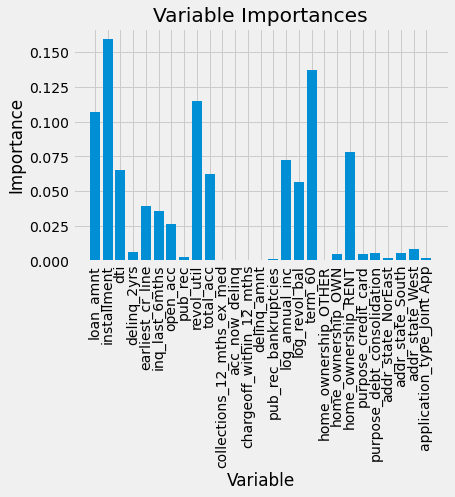

In [22]:
# feature importance   

feature_list = list(X_train.columns)
importances = list(rfc_4.feature_importances_)  # change model here
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#### 1. max_features : {"auto", "sqrt", "log2"}, int or float, default="auto"
    The number of features to consider when looking for the best split
    - auto is the best ( with min_samples_leaf = 100) 

In [ ]:
# "max_features" : ["auto"]
#  (min_samples_leaf = 100) with 

param_test1_rf = {"max_features" : ["auto", "sqrt", "log2"]} # or can put number between sqrt(feaatures #) and log_2(features#)


rf_gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100,n_jobs = -1,
                                                            class_weight="balanced",
                                                            random_state =50,
                                                            min_samples_leaf = 100),
                                     param_grid=param_test1_rf , scoring=ftwo_scorer,cv=10)

rf_gsearch1.fit(X_train,y_train)


print(rf_gsearch1.best_params_)
print("best F2 score:",rf_gsearch1.best_score_)

{'max_features': 'log2'}
best F2 score: 0.5324653338082349

not anymore XXX max_features conclusion: best is auto, and default is auto -> no need to tune

In [26]:
rfc_6 = RandomForestClassifier(n_estimators=100,n_jobs = -1,
                               class_weight="balanced",
                               random_state =50, 
                               min_samples_leaf = 100,
                               max_features ='log2')
rfc_6.fit(X_train,y_train)
y_pred_rfc_6 = rfc_6.predict(X_test)

In [27]:
print("F_beta2:   ",metrics.fbeta_score(y_test, y_pred_rfc_6, beta= 2))
#print("F_beta3:   ",metrics.fbeta_score(y_test, y_pred_rfc_5, beta= 3))
print("Precision: ",metrics.precision_score(y_test, y_pred_rfc_6))
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc_6))

print(classification_report(y_test, y_pred_rfc_6))

F_beta2:    0.5325214000066101
Precision:  0.32087025789106843
confusion matrix: 

 [[25453 13641]
 [ 3662  6445]]
              precision    recall  f1-score   support

           0       0.87      0.65      0.75     39094
           1       0.32      0.64      0.43     10107

    accuracy                           0.65     49201
   macro avg       0.60      0.64      0.59     49201
weighted avg       0.76      0.65      0.68     49201



Variable: installment          Importance: 0.1561
Variable: term_60              Importance: 0.1431
Variable: revol_util           Importance: 0.1135
Variable: loan_amnt            Importance: 0.1088
Variable: home_ownership_RENT  Importance: 0.0832
Variable: log_annual_inc       Importance: 0.0709
Variable: dti                  Importance: 0.0639
Variable: total_acc            Importance: 0.0605
Variable: log_revol_bal        Importance: 0.054
Variable: earliest_cr_line     Importance: 0.0388
Variable: inq_last_6mths       Importance: 0.0348
Variable: open_acc             Importance: 0.0252
Variable: addr_state_West      Importance: 0.0085
Variable: delinq_2yrs          Importance: 0.0067
Variable: addr_state_South     Importance: 0.0061
Variable: purpose_debt_consolidation Importance: 0.0054
Variable: purpose_credit_card  Importance: 0.0053
Variable: home_ownership_OWN   Importance: 0.0047
Variable: application_type_Joint App Importance: 0.0027
Variable: addr_state_NorEast   Importan

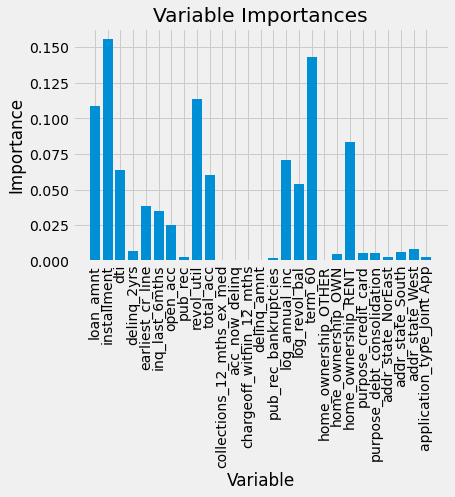

In [28]:
# feature importance   

feature_list = list(X_train.columns)
importances = list(rfc_6.feature_importances_)  # change model here
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#### 2. max_depth

    int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

#### 3. min_samples_split

    int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

In [ ]:
# IF HAVE TIME: TRY THIS 

In [25]:
param_test2_rf = {"max_depth" :range(3,14,2), 'min_samples_split':range(2,201,20)} 


rf_gsearch2 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100,n_jobs = -1,
                                                            class_weight="balanced",
                                                            random_state =50, 
                                                            min_samples_leaf = 100,
                                                            max_features = 'log2'),
                           param_grid=param_test2_rf , scoring=ftwo_scorer,cv=10)

rf_gsearch2.fit(X_train,y_train)


print(rf_gsearch2.best_params_)
print("best F2 score:",rf_gsearch2.best_score_)

KeyboardInterrupt: 

- 100k data
{'max_depth': 13, 'min_samples_split': 2}
best F2 score: 0.5411517741919258

{'max_depth': 9, 'min_samples_split': 182}  -> from the model below

rf_gsearch2 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=100,n_jobs = -1,
                                                            class_weight="balanced",random_state =50), 
                                                            
                           param_grid=param_test2_rf , scoring=ftwo_scorer,cv=10)

#### 4. min_samples_leaf 
we tuned at the begin -> 100 is the best

In [298]:
#param_test4_rf = {"min_samples_leaf" : [10, 30, 50, 70, 100]}  


#rf_gsearch4 = GridSearchCV(estimator=RandomForestClassifier(max_depth = 9, min_samples_split = 182, 
                                                            #n_estimators=100,n_jobs = -1, 
                                                            #class_weight="balanced",random_state =50),
                                                            #param_grid=param_test4_rf, scoring=ftwo_scorer,cv=10)
#rf_gsearch4.fit(X_train,y_train)


#print(rf_gsearch4.best_params_)
#print("best F2 score:",rf_gsearch4.best_score_)

{'min_samples_leaf': 50}


{'min_samples_leaf': 50}

In [310]:
#rf_gsearch4.best_score_

0.5376611694450567

### 5.  add: max_depth , min_sample_split ( but not helping : rf6 better than rf5)

In [29]:
rfc_5 = RandomForestClassifier(max_depth = 13, min_samples_split = 2, max_features = "log2",
                               n_estimators=100,n_jobs = -1, class_weight="balanced",
                               min_samples_leaf = 100, random_state =50)


rfc_5.fit(X_train,y_train)
y_pred_rfc_5 = rfc_5.predict(X_test)

In [30]:
print("Accuracy:  ",metrics.accuracy_score(y_test, y_pred_rfc_5))
print("Recall:    ",metrics.recall_score(y_test, y_pred_rfc_5))
print("F_1:       ",metrics.f1_score(y_test, y_pred_rfc_5))
print("F_beta2:   ",metrics.fbeta_score(y_test, y_pred_rfc_5, beta= 2))
#print("F_beta3:   ",metrics.fbeta_score(y_test, y_pred_rfc_5, beta= 3))
print("Precision: ",metrics.precision_score(y_test, y_pred_rfc_5))
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc_5))

print(classification_report(y_test, y_pred_rfc_5))

Accuracy:   0.6470193695250096
Recall:     0.6377757989512219
F_1:        0.42605505799927296
F_beta2:    0.5320237702211951
Precision:  0.31986899563318777
confusion matrix: 

 [[25388 13706]
 [ 3661  6446]]
              precision    recall  f1-score   support

           0       0.87      0.65      0.75     39094
           1       0.32      0.64      0.43     10107

    accuracy                           0.65     49201
   macro avg       0.60      0.64      0.59     49201
weighted avg       0.76      0.65      0.68     49201



Variable: installment          Importance: 0.1651
Variable: term_60              Importance: 0.1473
Variable: revol_util           Importance: 0.1154
Variable: loan_amnt            Importance: 0.1079
Variable: home_ownership_RENT  Importance: 0.0794
Variable: log_annual_inc       Importance: 0.0722
Variable: dti                  Importance: 0.0611
Variable: total_acc            Importance: 0.06
Variable: log_revol_bal        Importance: 0.0479
Variable: earliest_cr_line     Importance: 0.0393
Variable: inq_last_6mths       Importance: 0.0355
Variable: open_acc             Importance: 0.0242
Variable: addr_state_West      Importance: 0.008
Variable: delinq_2yrs          Importance: 0.0072
Variable: addr_state_South     Importance: 0.0052
Variable: purpose_credit_card  Importance: 0.0049
Variable: purpose_debt_consolidation Importance: 0.0044
Variable: home_ownership_OWN   Importance: 0.0043
Variable: pub_rec              Importance: 0.0027
Variable: application_type_Joint App Importance

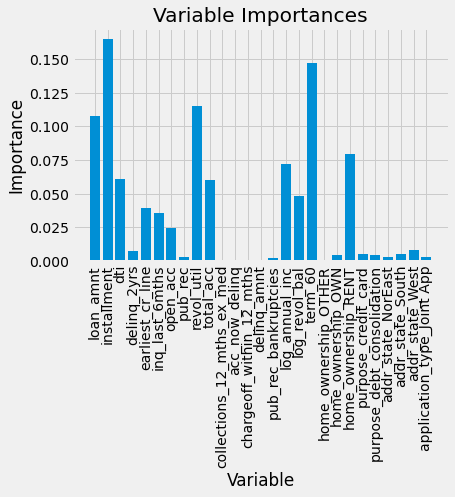

In [31]:
# feature importance   

feature_list = list(X_train.columns)
importances = list(rfc_5.feature_importances_)  # change model here
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#### Final: COMPARE MODEL rfc_4 and rfc__5 and rfc_6